In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import math

In [8]:
adm = pd.read_csv("./Data MIMIC/ADMISSIONS.csv")#reading csv, make your the folder "Data MIMIC" and the name "SERVICES.csv" match
print(adm.hadm_id.count())
print(adm.discharge_location.value_counts() )
adm.head()#Define a patient’s hospital admission, 
#complete description in https://mimic.physionet.org/mimictables/admissions/

129
DEAD/EXPIRED                 40
SNF                          39
HOME                         15
HOME HEALTH CARE             14
REHAB/DISTINCT PART HOSP     13
ICF                           3
LONG TERM CARE HOSPITAL       2
DISCH-TRAN TO PSYCH HOSP      1
HOME WITH HOME IV PROVIDR     1
HOSPICE-HOME                  1
Name: discharge_location, dtype: int64


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [13]:
call = pd.read_csv("./Data MIMIC/CALLOUT.csv")#reading csv, make your the folder "Data MIMIC" and the name "SERVICES.csv" match
print(call.hadm_id.count())
print(call.callout_service.value_counts() )
#CALLOUT_SERVICE
call.head()#information when a patient was READY for discharge from the ICU 
#complete description in https://mimic.physionet.org/mimictables/callout/

77
MED      47
SURG      7
CCU       5
TSURG     4
OMED      3
NSURG     3
CSURG     3
NMED      3
ORTHO     1
CMED      1
Name: callout_service, dtype: int64


,row_id,subject_id,hadm_id,submit_wardid,submit_careunit,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,...,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,3917,10017,199207,7,NaN,45,CCU,1,MED,1,...,Inactive,Discharged,45.0,Acknowledged,2149-05-31 10:44:34,2149-05-31 10:44:34,2149-05-31 15:08:04,2149-05-31 22:40:02,NaN,NaN
1,3919,10026,103770,33,NaN,3,SICU,3,NMED,1,...,Inactive,Discharged,3.0,Revised,2195-05-18 13:56:20,2195-05-19 15:45:30,NaN,2195-05-19 17:40:03,NaN,NaN
2,3920,10027,199395,12,NaN,55,CSRU,55,CSURG,1,...,Inactive,Discharged,55.0,Acknowledged,2190-07-20 08:15:20,2190-07-20 08:15:20,2190-07-20 08:57:46,2190-07-20 17:10:02,NaN,NaN
3,3921,10029,132349,33,NaN,45,SICU,1,MED,0,...,Inactive,Discharged,45.0,Acknowledged,2139-09-24 09:53:37,2139-09-24 09:53:37,2139-09-24 09:56:02,2139-09-25 19:10:01,NaN,NaN
4,3922,10033,157235,33,NaN,4,SICU,1,MED,1,...,Inactive,Discharged,4.0,Revised,2132-12-06 10:16:08,2132-12-06 14:53:53,NaN,2132-12-06 15:10:02,NaN,NaN


As an example, we want to join this first two tables, Admissions and Callouts. This new table will only have values when the same hadm_id appears in both tables.

In [9]:
merge_innerjoin = pd.merge(adm,call,on='hadm_id')
print(merge_innerjoin.hadm_id.count())
print(merge_innerjoin.discharge_location.value_counts() )
merge_innerjoin.head()

77
SNF                         32
DEAD/EXPIRED                15
HOME                         9
HOME HEALTH CARE             9
REHAB/DISTINCT PART HOSP     6
ICF                          3
HOSPICE-HOME                 2
DISCH-TRAN TO PSYCH HOSP     1
Name: discharge_location, dtype: int64


,row_id_x,subject_id_x,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,Inactive,Discharged,45.0,Acknowledged,2149-05-31 10:44:34,2149-05-31 10:44:34,2149-05-31 15:08:04,2149-05-31 22:40:02,NaN,NaN
1,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,Inactive,Discharged,3.0,Revised,2195-05-18 13:56:20,2195-05-19 15:45:30,NaN,2195-05-19 17:40:03,NaN,NaN
2,12278,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,...,Inactive,Discharged,55.0,Acknowledged,2190-07-20 08:15:20,2190-07-20 08:15:20,2190-07-20 08:57:46,2190-07-20 17:10:02,NaN,NaN
3,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,Inactive,Discharged,45.0,Acknowledged,2139-09-24 09:53:37,2139-09-24 09:53:37,2139-09-24 09:56:02,2139-09-25 19:10:01,NaN,NaN
4,12283,10033,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,Inactive,Discharged,4.0,Revised,2132-12-06 10:16:08,2132-12-06 14:53:53,NaN,2132-12-06 15:10:02,NaN,NaN


Let say we are interested in knowing the cathegories of callout service from CALLOUT table from an specific discharge location 
from ADMISSIONS table as DEAD/EXPIRED

<BarContainer object of 7 artists>

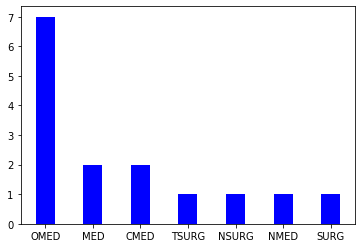

In [18]:
#Lets cut the data base

# Select the ones you want
df = merge_innerjoin[['hadm_id','discharge_location','callout_service']]
#filter
newdf = df[(df.discharge_location == "DEAD/EXPIRED")]
      
#Bar plot
group = list(newdf.callout_service.unique()) 
values = list(newdf.callout_service.value_counts()) 

fig = plt.figure()

# creating the bar plot 
plt.bar(group, values, color ='blue',  
        width = 0.4) 
      

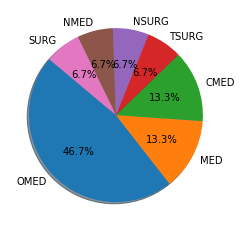

In [19]:
# Pie Plot, same values but in percentage for the pie
plt.pie(values, labels=group,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()